[77 32 69  7 73 64 77 80  7  0  0  0  0  0]
[0.66101695 0.77966102 0.66101695 ... 0.81355932 0.76271186 0.55932203] [0.63636364 0.64935065 0.68831169 ... 0.68831169 0.74025974 0.49350649] [0.63366337 0.69585859 0.74195122 ... 0.73728    0.93188235 0.48471154]
[0.64368132 0.70829008 0.69709329 ... 0.74638367 0.81161799 0.51251336]
[0.01230761 0.05392034 0.0336197  ... 0.05153575 0.08553231 0.03329291]
(3, 1255)
(1255,)
92
[0.63137371 0.65436974 0.66347359 ... 0.69484792 0.72608568 0.47922044]
0.5180286186666332


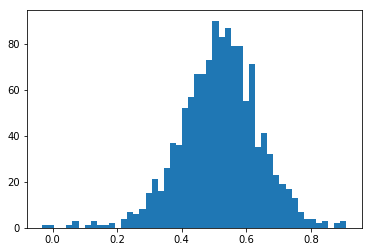

In [29]:
import csv
import numpy as np

def grade(data):
    #0 data:
    #1 pisacy standard
    #2 dyslektycy
    #3 sredni
    #...
    #5 sredni polski
    #6 srednia matma
    #7 liczba ang
    #8 sredni ang
    #...  ostatnie 3 razy niemiecki i rosyjski
    print(data)
    
with open("../datasets/podst-clean.csv", "r") as f:
    reader = csv.reader(f)
    data =[]
    for e in reader:
        l = []
        for i in e[5:]:
            if i == '':
                l.append(0)
            else:
                l.append(int(i))
        data.append(l)
    data = np.asarray(data)
    
print(data[0])
pol = data[...,4]
mat = data[...,5]
ang = data[...,7]
nie = data[...,10]
ros = data[...,13]

n_pol = (pol - np.min(pol))/(np.max(pol)-np.min(pol))
n_mat = (mat - np.min(mat))/(np.max(mat)-np.min(mat))
n_ang = (ang - np.min(ang))/(np.max(ang)-np.min(ang))
# n_nie = (nie - np.min(nie))/(np.max(nie)-np.min(nie))
# n_ros = (ros - np.min(ros))/(np.max(ros)-np.min(ros))

ang_wspl = data[..., 7] /(data[...,1] + data[...,2])
# print(pol, mat, ang)
print(n_pol, n_mat, n_ang*ang_wspl) #n_nie, n_ros)

mean = n_pol + n_mat + n_ang * ang_wspl
mean /= 3

print(mean)

cos = np.asarray([n_pol, n_mat, n_ang * ang_wspl])

std = np.std(cos, axis = 0)

print(std)
print(cos.shape)
print(std.shape)
print(np.max(mat))

grade = mean - std
    
print(grade)
print(np.mean(grade))

import matplotlib.pyplot as plt

plt.hist(grade, bins = 50)
plt.show()

In [31]:
with open("../datasets/podst-clean.csv", "r") as f:
    reader = csv.reader(f)
    old = []
    for e in reader:
        old.append(e)

with open("../datasets/podst-clean-ext.csv", "w") as f:
    writer = csv.writer(f)
    
    for i in range(len(old)):
        old[i].append(grade[i])
        writer.writerow(old[i])

687
[96 25 74  7 62  6 57  7 54  6 91 64  5 91 43  5 76  8  2 35  0  0  0  0]
(687,)
[ 0.41931447  0.50060666  0.71254104  0.36587935  0.43366823  0.29731681
  0.34297414  0.49770068  0.43258207  0.39702892  0.4599819   0.37775149
  0.37174806  0.37160149  0.42455329  0.35178563  0.16473527  0.39906978
  0.25528787  0.4270514   0.37283779  0.20712602  0.25582432  0.0215752
  0.28829025  0.19700904  0.35809276  0.41772831  0.42355648  0.31153688
  0.40684036  0.36402759  0.3946163   0.35522759  0.51912122  0.46756625
  0.42442872  0.4397179   0.30958961  0.17616199  0.35915559  0.40128671
  0.34980116  0.29428925  0.49791453  0.45017328  0.39791277  0.34759303
  0.46376451  0.09457459  0.29610004  0.27514269  0.3631128   0.41163635
  0.23403879  0.3065412   0.47539466  0.42906146  0.42345086  0.29276758
  0.43472589  0.33303124  0.5004841   0.32186864  0.42001848  0.37176237
  0.41662882  0.22188946  0.72274406  0.25887415  0.3573678   0.41351528
  0.44030356  0.25584954  0.36565457  0.

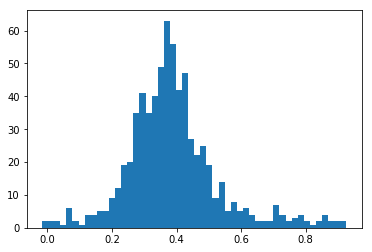

In [49]:
import csv
import numpy as np

def grade(data):
    #0 data:
    #1 pisacy standard
    #2 dyslektycy
    #3 sredni
    #...
    #5 sredni polski
    #6 srednia matma
    #7 liczba ang
    #8 sredni ang
    #...  ostatnie 3 razy niemiecki i rosyjski
    print(data)
    
with open("../datasets/gim-clean.csv", "r") as f:
    reader = csv.reader(f)
    data =[]
    for e in reader:
        l = []
        for i in e[5:]:
            word = ''
            for k in i:
                if k != '%':
                    word += k
            if word == '':
                l.append(0)
            else:
                l.append(int(word))
                
        data.append(l)
    data = np.asarray(data)

print(len(data))
print(data[0])
pol = data[...,2]
his = data[...,4]
mat = data[...,6]
prz = data[...,8]
ang_p_l = data[...,10]
ang_p = data[...,11]
ang_r_l =data[...,13]
ang_r = data[...,14]

n_pol = (pol - np.min(pol))/(np.max(pol)-np.min(pol))
n_mat = (mat - np.min(mat))/(np.max(mat)-np.min(mat))
n_his = (his - np.min(his))/(np.max(his)-np.min(his))
n_prz = (prz - np.min(prz))/(np.max(prz)-np.min(prz))
n_ang_p = (ang_p - np.min(ang_p))/(np.max(ang_p)-np.min(ang_p))
n_ang_r = (ang_r - np.min(ang_r))/(np.max(ang_r)-np.min(ang_r))

ang_p_wspl = ang_p_l / data[...,0]
ang_r_wspl = ang_p_l / data[...,0]

n_ang_p *= ang_p_wspl
n_ang_r *= ang_p_wspl

results_row = np.stack([pol, mat, his, prz, ang_p, ang_r], axis = -1)
results = np.stack([n_pol, n_mat, n_his, n_prz, n_ang_p, n_ang_r], axis = -1)

mean = np.mean(np.asarray([n_pol, n_mat, n_his, n_prz, n_ang_p, n_ang_r]), axis = 0)

#debug info
# for i in range(len(mean)):
#     if mean[i] < 0.1:
#         print(results_row[i], results[i], i)
# print(mean.shape)

# print(mean)

# cos = np.asarray([n_pol, n_mat, n_ang * ang_wspl])

std = np.std(results, axis = 1)

# print(std)
# print(cos.shape)
print(std.shape)
# print(np.max(mat))

grade = mean - std
    
print(grade)
print(np.mean(grade))

# import matplotlib.pyplot as plt

plt.hist(grade, bins = 50)
plt.show()

In [50]:
with open("../datasets/gim-clean.csv", "r") as f:
    reader = csv.reader(f)
    old = []
    for e in reader:
        old.append(e)

with open("../datasets/gim-ext.csv", "w") as f:
    writer = csv.writer(f)
    
    for i in range(len(old)):
        old[i].append(grade[i])
        writer.writerow(old[i])